# Ecuaciones

Vamos a crear una pequeña simulación de la evolución de una población de conejos y zorros haciéndo uso de un modelo matemático simple:

    dR/dt = k1 * R - k2 * R * F  <- Es la variación instantanea en el número de conejos R
    dF/dt = k4 * R * F - k3 * F  <- Es la variación instantanea en el número de zorros F
   

In [1]:
k1 = 1          # Tasa de natalidad de los zorros
k2 = 0.01       # Capacidad de los zorros para cazar conejos
k3 = 0.5        # Mortalidad propia de los zorros
k4 = 0.05       # Tasa de natalidad de los zorros
delta_t = 0.001 # Incremento del tiempo que usaremos en nuestra simulación

In [2]:
# Escribe una función que toma el número de conejos y zorros actual y devuelve el incremento de conejos instantáneo
# es decir dR/dt
def delta_conejos(conejos, zorros):
    return k1 * conejos - k2 *conejos * zorros

In [3]:
# Escribe una función que toma el número de conejos y zorros actual y devuelve el incremento de zorros instantáneo
# es decir dF/dt
def delta_zorros(conejos, zorros):
    return k4 * conejos * zorros - k3 * zorros 

In [4]:
# Escribe una función que toma el número de conejos y zorros actual y devulve una tupla con los valores 
# de dR/dt y dF/dt
def delta_poblacion(conejos, zorros):
    num_conejos = delta_conejos(conejos, zorros)
    num_zorros = delta_zorros(conejos, zorros)
    return num_conejos, num_zorros

In [6]:
# Prueba la función delta_población invocandola para 1000 conejos y 10 zorros
delta_poblacion(100, 15)

(85.0, 67.5)

In [7]:
# Fijemos estos valores en unas variables globales
CONEJOS_INICIALES = 1000
ZORROS_INICIALES = 10

In [8]:
# Calcula de nuevo el número de conejos y zorros pero usando como valores las variables globales que hemos 
# definido.
conejos, zorros = delta_poblacion(CONEJOS_INICIALES, ZORROS_INICIALES)
print("conejos[{}] zorros[{}]".format(conejos, zorros))

conejos[900.0] zorros[495.0]


In [9]:
# Escribe una función que dado el número de conejos y de zorros inicial y un número de peridos nos 
# devuelva una lista con el resultado de avanzar la población ese número de periodos:
#
# simular(CONEJOS_INICIALES, ZORROS_INICIALES, 10) devolverá algo del estilo de:
#
#   [(1000, 10), (980.254885, 11.2257), (970.5468, 12.2258)...] 
#
# La lista contiene tantos elementos como periodos:
#
def simular(conejos, zorros, periodos):
    poblacion = [(conejos, zorros)]
    conejos_anteriores = conejos
    zorros_anteriores = zorros
    
    #Bucle 
    for n in range(1, periodos):
        
        #Calculo poblacion
        dRdt, dFdt = delta_poblacion(conejos_anteriores, zorros_anteriores)
    
        #Nuevos valores
        conejos_nuevos = conejos_anteriores * dRdt * delta_t
        zorros_nuevos = zorros_anteriores * dFdt * delta_t
        
        #Añadir a la lista
        poblacion.append((conejos_nuevos, zorros_nuevos))
        
        #Reemplazar valores a antiguos para el bucle
        conejos_anteriores = conejos_nuevos
        zorros_anteriores = zorros_nuevos
    return poblacion

In [10]:
#Prueba
simular(100, 10, 10)

[(100, 10),
 (9.0, 0.45),
 (0.08063550000000001, -1.0124999999999997e-05),
 (6.502084518585993e-06, -5.0844492566015594e-14),
 (4.227710308683567e-14, -1.2925803717005787e-30),
 (1.7873534454149302e-30, -8.353820086527996e-64),
 (3.194632338836622e-63, -3.489315501903931e-130),
 (1.0205675780340748e-128, -6.0876613359135404e-263),
 (1.0415581813343375e-259, -0.0),
 (0.0, -0.0)]

In [11]:
# Evaluemos 1.000.000 de periodos y guardemos el resultado en la variable global HISTORIA
HISTORIA = simular(CONEJOS_INICIALES, ZORROS_INICIALES, 1000000)

In [ ]:
# Comprobemos el n´mero de elementos en HISTORIA
len(HISTORIA)

In [12]:
# Comprobemos los valores de conejos y zorros en el perido 300
HISTORIA[300]

(0.0, -0.0)

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

In [13]:
# Extraigamos la historia de los conejos y la de los zorros a las variables globales correspondientes
HISTORIA_CONEJOS = list(map(lambda punto: punto[0], HISTORIA))
HISTORIA_ZORROS = list(map(lambda punto: punto[1], HISTORIA))

Text(0,0.5,'Num. Zorros')

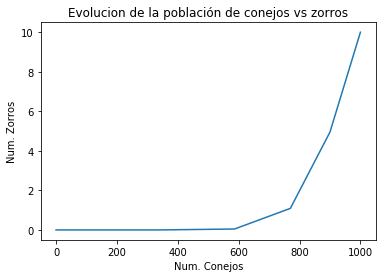

In [16]:
# Generemos una gráfica de dichos valores x = conejos, y = zorros
plt.plot(HISTORIA_CONEJOS, HISTORIA_ZORROS)
plt.title('Evolucion de la población de conejos vs zorros')
plt.xlabel('Num. Conejos')
plt.ylabel('Num. Zorros')

In [ ]:
# Generemos una gráfica de la evolución de los conejos
pass